In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

In [2]:
def func(x, m, c):  # this is a 'straight line'
    return m*x + c

# def func(x, A, B):
#     return A/(np.sin(0.5*0.0174532925199*(x-B))**4)

In [3]:
xs = np.array([343, 344, 360, 390, 420, 450, 480, 510, 540, 570, 600, 630, 660, 690])
ys = np.array([0, 2342, 4268, 4910, 4886, 5081, 5043, 5287, 5220, 5228, 5355, 5337, 9483, 10244])

In [4]:
popt, pcov = curve_fit(func, xs[3:-2], ys[3:-2])
# popt = [0.000109843, -0.00126324]

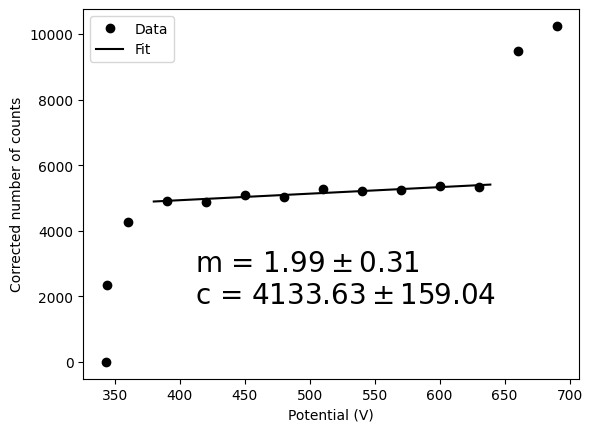

In [5]:
xFit = np.arange(380, 640, 1)
plt.plot(xs, ys, 'ko', label='Data')
plt.plot(xFit, func(xFit, *popt), 'k', label='Fit')

text = rf"""
m = ${popt[0]:.2f} \pm {pcov[0,0]**0.5:.2f}$
c = ${popt[1]:.2f} \pm {pcov[1,1]**0.5:.2f}$
"""
plt.text(0.3, 0.2, text, fontsize=20, transform=plt.gcf().transFigure)
plt.xlabel(r'Potential (V)')
plt.ylabel(r'Corrected number of counts')
plt.legend()

## Inverse Square

In [6]:
d = np.array([2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 7.0])
R = np.array([9904, 7239, 5261, 3957, 3066, 2403, 1866, 1504, 1266, 912])/60

In [7]:
def quad(x, a): # a quadratic function
    return a/x**2

popt, pcov = curve_fit(quad, d, R)

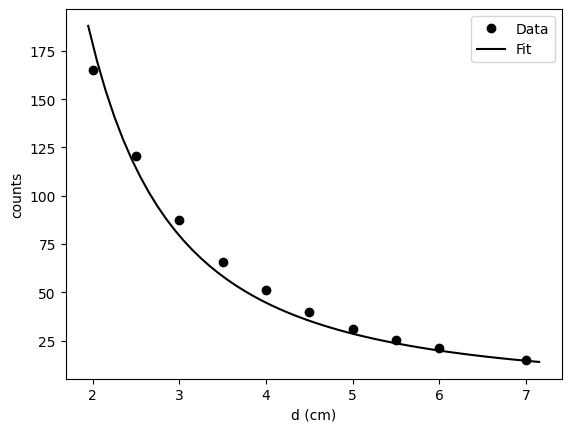

In [8]:
xFit = np.arange(1.95, 7.2, 0.1)
plt.plot(d, R, 'ko', label='Data')
plt.plot(xFit, quad(xFit, *popt), 'k', label='Fit')

text = rf"""
a = ${popt[0]:.2f} \pm {pcov[0, 0]**0.5:.2f} $
"""
# plt.text(0.4, 0.5, text, fontsize=20, transform=plt.gcf().transFigure)
plt.xlabel('d (cm)')
plt.ylabel('counts')
plt.legend()

In [9]:
xs = np.log(d)
ys = np.log(R)

In [10]:
popt, pcov = curve_fit(func, xs, ys)

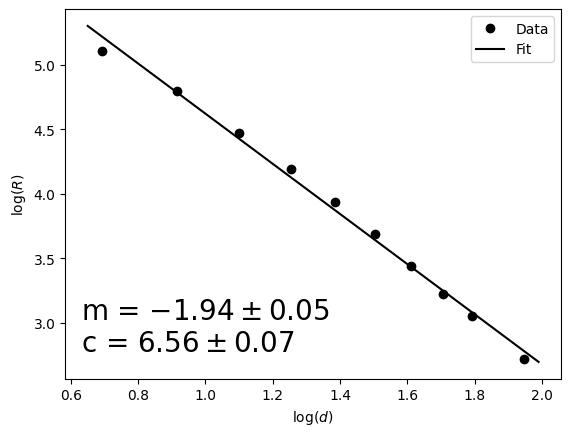

In [11]:
xFit = np.arange(0.65, 2, 0.01)
plt.plot(xs, ys, 'ko', label='Data')
plt.plot(xFit, func(xFit, *popt), 'k', label='Fit')

text = rf"""
m = ${popt[0]:.2f} \pm {pcov[0,0]**0.5:.2f}$
c = ${popt[1]:.2f} \pm {pcov[1,1]**0.5:.2f}$
"""
plt.text(0.15, 0.1, text, fontsize=20, transform=plt.gcf().transFigure)
plt.xlabel(r'$\log(d)$')
plt.ylabel(r'$\log(R)$')
plt.legend()

In [12]:
import math

def calculate_activity(A0, t_half, t):
    """Calculate the current activity of a material given its initial activity, half-life, and time elapsed."""
    
    # calculate the decay constant
    decay_constant = math.log(2) / t_half
    
    # calculate the current activity
    current_activity = A0 * math.exp(-decay_constant * t)
    
    return current_activity


In [13]:
A0 = 86e3  # initial activity in Becquerels
t_half = 30+7/365  # half-life in seconds
t = 6+10/12  # elapsed time in seconds

current_activity = calculate_activity(A0, t_half, t)
print(f"The current activity of Cs-137 is {current_activity:.2f} Becquerels.")

The current activity of Cs-137 is 73447.04 Becquerels.


In [14]:
A0 = 10e3  # initial activity in Becquerels
t_half = 3.77  # half-life in seconds
t = 6+10/12  # elapsed time in seconds

current_activity = calculate_activity(A0, t_half, t)
print(f"The current activity of Tl-204 is {current_activity:.2f} Becquerels.")

The current activity of Tl-204 is 2846.86 Becquerels.


# Bad things

In [16]:
def mids(arr):
    ret = []
    for i in range(len(arr)-1):
        ret.append((arr[i]+arr[i+1])/2)
    return ret

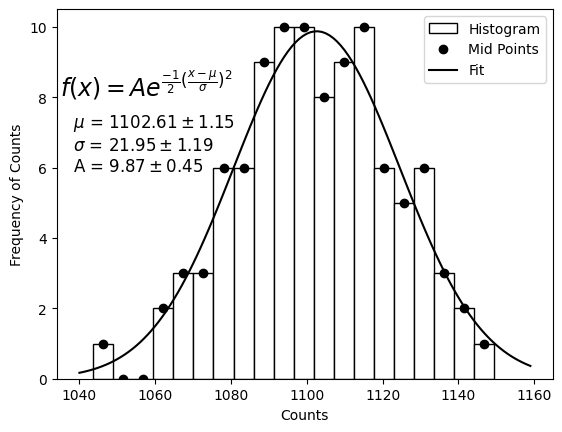

In [54]:
def gauss(x, mu, sigma, A):
	return A*np.exp(-(x-mu)**2/(2*sigma**2))
# set a particular seed
np.random.seed(11)
data = np.random.normal(1102, 22, (100))
a = plt.hist(data, bins=20, color = "#fff", lw=1, ec="#000", label="Histogram")
xs = mids(a[1])
ys = a[0]
plt.plot(mids(a[1]), a[0], 'ko', label="Mid Points")

popt, pcov = curve_fit(gauss, xs, ys, [1102, 22, 10])

xFit = np.arange(1040, 1160, 1)
plt.plot(xFit, gauss(xFit, *popt), 'k', label='Fit')

text1 = r"$f(x) = A e^{\frac{-1}{2}(\frac{x-\mu}{\sigma})^2}$" #
text = rf"""
$\mu$ = ${popt[0]:.2f} \pm {pcov[0,0]**0.5:.2f}$
$\sigma$ = ${popt[1]:.2f} \pm {pcov[1,1]**0.5:.2f}$
A = ${popt[2]:.2f} \pm {pcov[2,2]**0.5:.2f}$
"""
plt.text(0.15, 0.5, text, fontsize=12, transform=plt.gcf().transFigure)
plt.text(0.13, 0.7, text1, fontsize=17, transform=plt.gcf().transFigure)
plt.xlabel("Counts")
plt.ylabel("Frequency of Counts")
plt.legend()